In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Regresión lineal

## Feature generation

Dado un dataset $X$ con $N$ muestras $x_i \in \mathbb{R}$, tal que quedan los pares $(x_i, y_i)$.

Se define la pendiente $\beta$ de la recta que pasa por el origen como:

$$ \beta=(X^T X)^{-1} X^Ty $$

¿Cómo considerar la ordenada al origen?

### Ordenada

Sea 

$$
  X =
  \left[ {\begin{array}{c}
    x_1\\
    x_2 \\
    x_3 \\
    \vdots \\
    x_N \\
  \end{array} } \right]\in \mathbb{R}^{Nx1}
$$

Puede agregarse una columna de 1, tal que queda $X_{aug}$:

$$
  X_{aug} =
  \left[ {\begin{array}{cc}
    1 & x_1\\
    1 & x_2 \\
    1 & x_3 \\
    \vdots & \vdots \\
    1 & x_N \\
  \end{array} } \right] \in \mathbb{R}^{Nx2}
$$

De modo tal que $\beta \in \mathbb{R}^2$ en vez de ser solo la pendiente

$$ \beta=(X_{aug}^T X_{aug})^{-1} X_{aug}^Ty $$

\begin{align}
dim(\beta) = ([2xN][Nx2])^{-1} [2xN][Nx1]\\
dim(\beta) = [2x2] [2x1]\\
dim(\beta) = [2x1] \rightarrow \beta \in \mathbb{R}^2
\end{align}

$$
\beta_0 = \text{ordenada, multiplica la columna de 1}\\
\beta_1 = \text{pendiente, multiplica la columna de x}\\
$$

Nota: En el libro MML $X_{aug}$ le llaman $\Phi(X)$.

### Features polinómicas

En lugar de una columna de 1, se agregan columnas con las potencias de $x_i$:

$$
  X_{aug} =
  \left[ {\begin{array}{cccc}
    x_1 & x_1^{2} & \cdots & x_1^{M}\\
    x_2 & x_2^{2} & \cdots & x_2^{M}\\
    x_3 & x_3^{2} & \cdots & x_3^{M}\\
    \vdots & \vdots & \ddots& \vdots\\
    x_N & x_N^{2} & \cdots & x_N^{M}\\
  \end{array} } \right] \in \mathbb{R}^{NxM}
$$

Luego, $\beta \in \mathbb{R}^{M}$

$\hat{y}_i = \beta_1 x_{i1} + \cdots + \beta_M x_{iM}$


$\hat{y}_i = \beta_1 x_{i1} + \cdots + \beta_M x^{M}_{i1}$

## Regresión polinómica

$P(x) = 2 + 5x - 3x^2 + x^3$

In [4]:
poly = np.polynomial.Polynomial(coef=(2,5,-3,1))

In [5]:
xpoly, ypoly = poly.linspace(400,[-4,4])

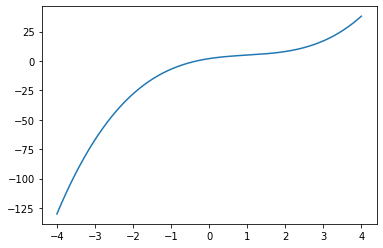

In [6]:
f, ax = plt.subplots()

ax.plot(xpoly,ypoly)

plt.show()

In [7]:
xpoly = xpoly.reshape((400,1))

In [8]:
xpoly1 = np.hstack((xpoly,xpoly))
xpoly1 = np.hstack((xpoly1,xpoly1))

In [9]:
xpoly1[:,0] = xpoly1[:,0]**0 # Columna de 1
xpoly1[:,2] = xpoly1[:,2]**2 # x^2
xpoly1[:,3] = xpoly1[:,3]**3 # x^3

In [11]:
xpoly1.shape

(400, 4)

In [12]:
xpoly1[:2,:]

array([[  1.        ,  -4.        ,  16.        , -64.        ],
       [  1.        ,  -3.97994987,  15.84000101, -63.04241001]])

$$ \beta=(X^T X)^{-1} X^Ty $$


In [13]:
coef_hat = np.dot(np.linalg.inv(np.dot(xpoly1.T,xpoly1)), np.dot(xpoly1.T,ypoly))

In [18]:
coef_hat = np.linalg.inv((xpoly1.T @ xpoly1)) @ xpoly1.T @ ypoly

array([ 2.,  5., -3.,  1.])

In [19]:
coef_hat2 = np.dot(np.linalg.pinv(np.dot(xpoly1.T,xpoly1)), np.dot(xpoly1.T,ypoly))

In [20]:
coef_hat, coef_hat2

(array([ 2.,  5., -3.,  1.]), array([ 2.,  5., -3.,  1.]))

In [21]:
polyhat = np.polynomial.Polynomial(coef=coef_hat)
xphat, yphat = polyhat.linspace(400,[-4,4])

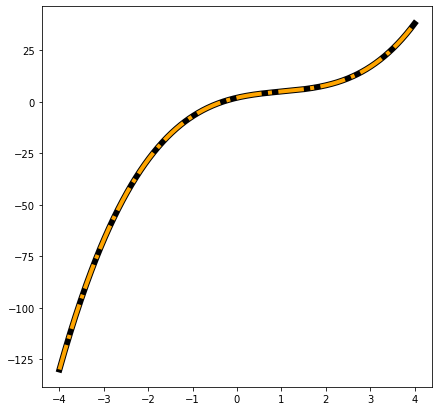

In [22]:
f, ax = plt.subplots(figsize=(7,7))

ax.plot(xpoly,ypoly,color='black',lw=6)
ax.plot(xphat,yphat, color='orange',ls='-.',lw=4)

plt.show()

## Random sample + ruido

In [23]:
idx = np.random.randint(0,400,50)

In [24]:
xsample = xpoly1[idx,:]
ysample = ypoly[idx]

In [27]:
ysample = ysample + np.random.normal(loc=0,scale=4,size = 50)

In [28]:
xsample.shape

(50, 4)

In [29]:
coef_hat3 = np.dot(np.linalg.pinv(np.dot(xsample.T,xsample)), np.dot(xsample.T,ysample))

In [30]:
xspace = np.linspace(-4,4,400)

In [31]:
xspace_aug = np.array([xspace**0,xspace**1,xspace**2,xspace**3]).T

In [32]:
xspace_aug.shape

(400, 4)

In [33]:
yhat = xspace_aug @ coef_hat3

In [37]:
coef_hat

array([ 2.,  5., -3.,  1.])

In [36]:
coef_hat3

array([ 2.36273836,  7.0188679 , -3.20511529,  0.82677056])

In [34]:
yhat.shape

(400,)

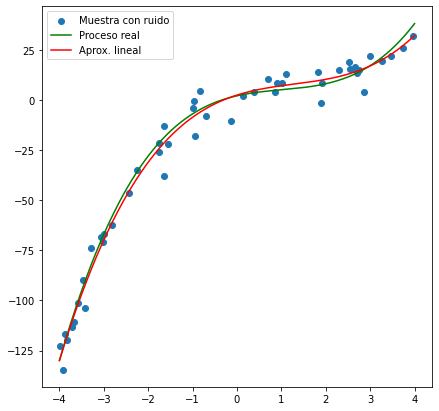

In [35]:
f, ax = plt.subplots(figsize=(7,7))

ax.scatter(xsample[:,1],ysample, label='Muestra con ruido')
ax.plot(xpoly,ypoly, color='green', label='Proceso real') # Calculado arriba
ax.plot(xspace[:],yhat, color='red', label='Aprox. lineal')
plt.legend()
plt.show()

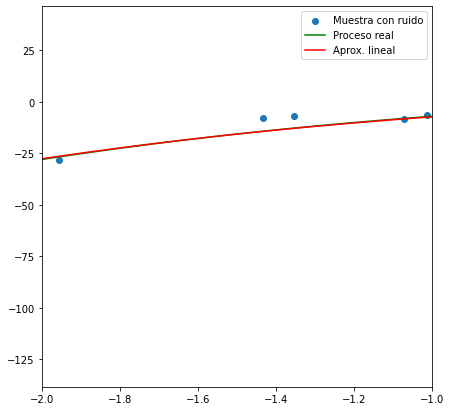

In [29]:
f, ax = plt.subplots(figsize=(7,7))

ax.scatter(xsample[:,1],ysample, label='Muestra con ruido')
ax.plot(xpoly,ypoly, color='green', label='Proceso real') # Calculado arriba
ax.plot(xspace[:],yhat, color='red', label='Aprox. lineal')
ax.set_xlim(-2,-1)
plt.legend()
plt.show()

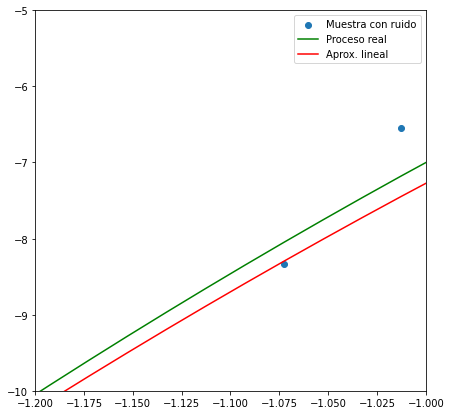

In [31]:
f, ax = plt.subplots(figsize=(7,7))

ax.scatter(xsample[:,1],ysample, label='Muestra con ruido')
ax.plot(xpoly,ypoly, color='green', label='Proceso real') # Calculado arriba
ax.plot(xspace[:],yhat, color='red', label='Aprox. lineal')
ax.set_xlim(-1.2,-1)
ax.set_ylim(-10,-5)
plt.legend()
plt.show()